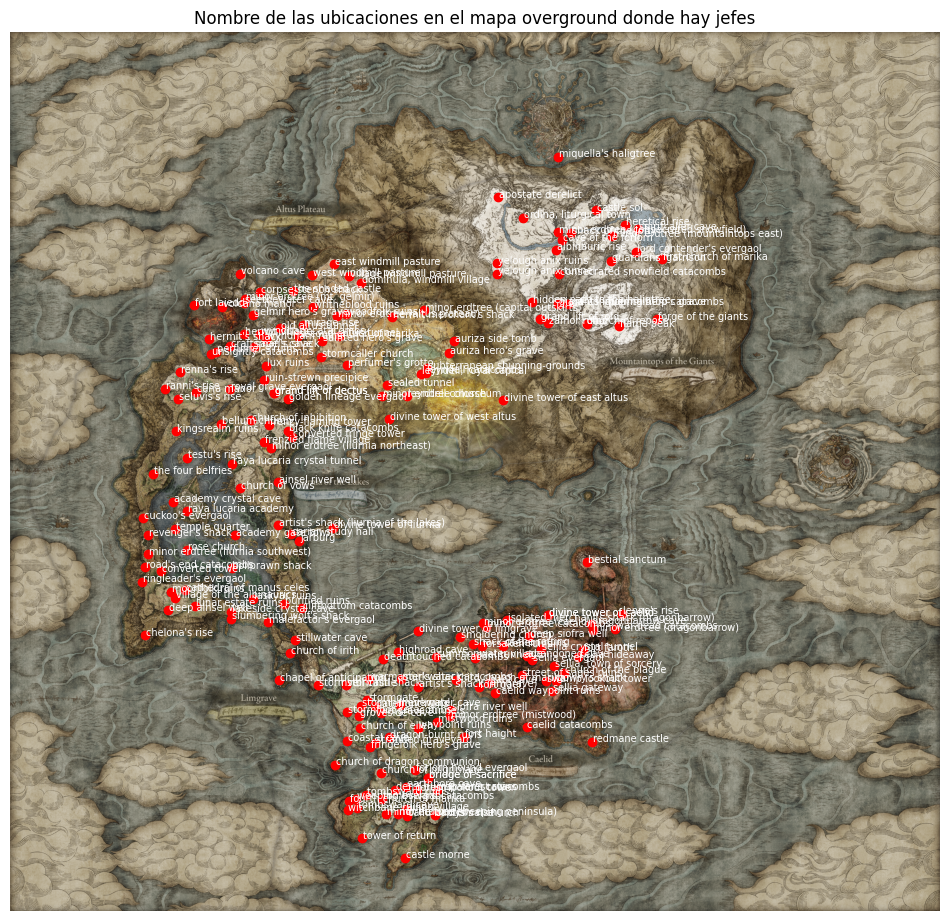

In [23]:
# Aplicar transformación a todas las filas
df_combined['pixel_coords'] = df_combined.apply(lambda row: custom_to_pixel(row['x'], row['y']), axis=1)

# Separar las coordenadas pixel en columnas
df_combined['x_pixel'] = df_combined['pixel_coords'].apply(lambda p: p[0])
df_combined['y_pixel'] = df_combined['pixel_coords'].apply(lambda p: p[1])

# Filtrar filas donde haya bosses (asumiendo bosses no vacío o >0)
df_bosses = df_bosses[df_bosses['location'].notnull() & (df_bosses['location'] != '')]

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)

for _, row in df_combined.iterrows():
    if pd.notnull(row['x_pixel']) and pd.notnull(row['y_pixel']):
        ax.plot(row['x_pixel'], row['y_pixel'], 'ro')  # punto rojo
        # Opcional: mostrar nombre
        ax.text(row['x_pixel']+10, row['y_pixel'], row['location'], fontsize=7, color='white')

plt.axis('off')
plt.title('Nombre de las ubicaciones en el mapa overground donde hay jefes')
plt.show()